# Problem 3

Solving problem 3 using R in jupyter lab. Documentation is written in a separate pdf file.

-------------------


### a)

Extract data from https://www.uio.no/studier/emner/matnat/math/STK4900/v21/obliger/cirrhosis.txt

In [4]:
data = read.table("https://www.uio.no/studier/emner/matnat/math/STK4900/v21/obliger/cirrhosis.txt", header=T)

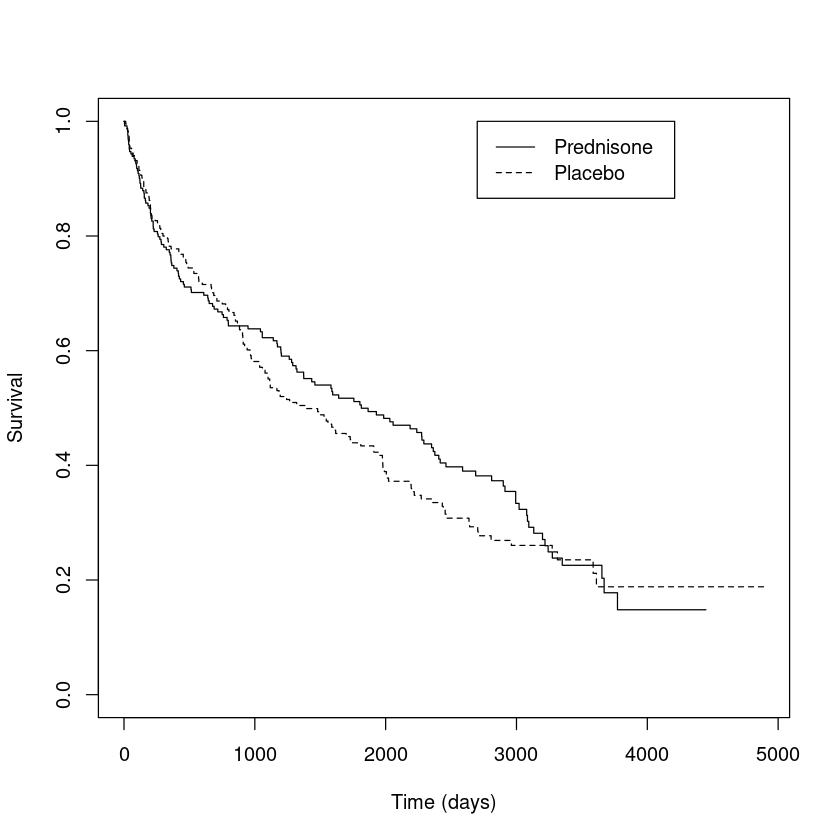

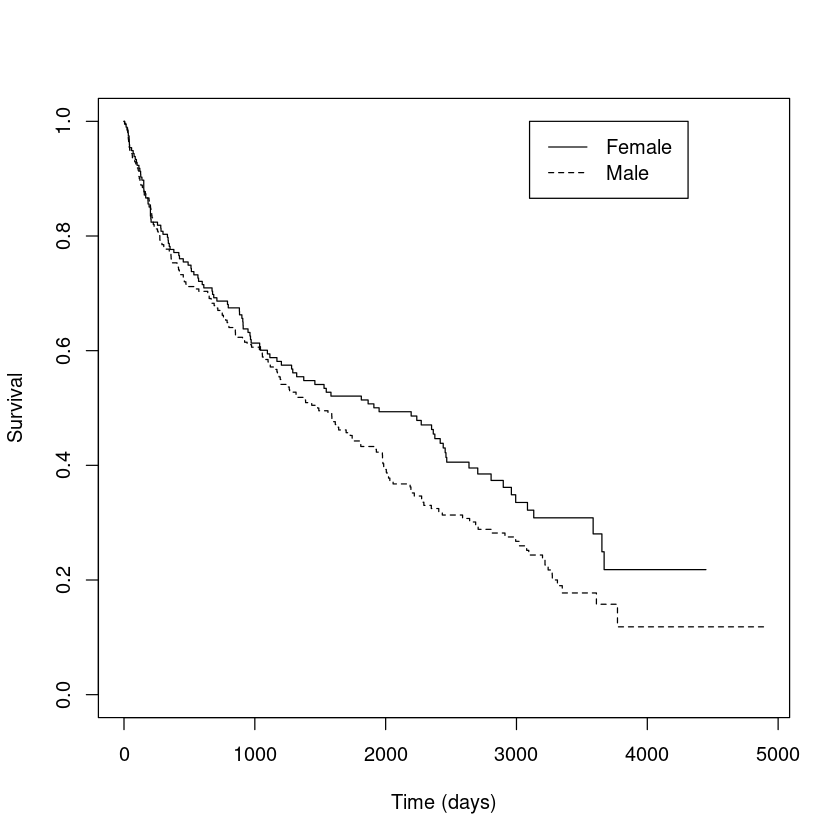

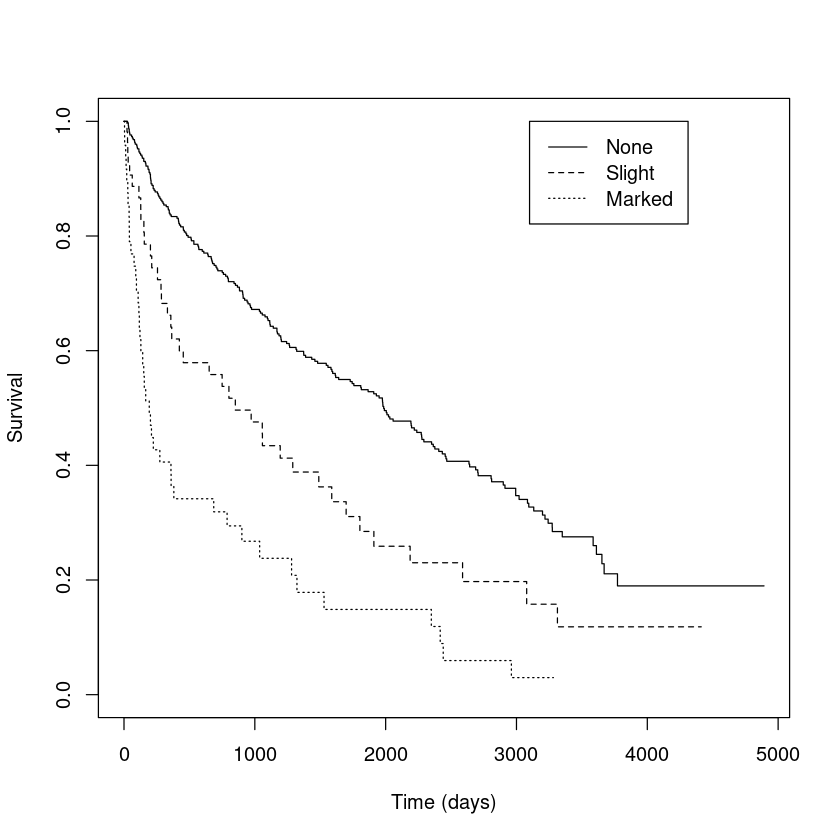

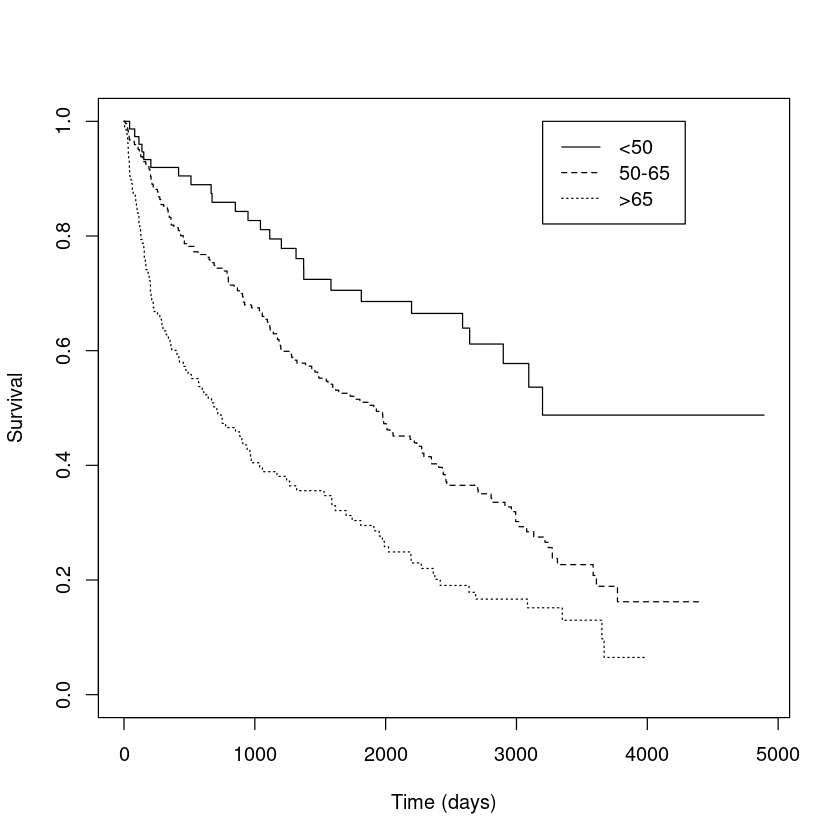

In [5]:
library(survival)
treat = survfit(Surv(data$time, data$status)~data$treat, conf.type="none")
sex = survfit(Surv(data$time, data$status)~data$sex, conf.type="none")
ascites = survfit(Surv(data$time, data$status)~data$asc, conf.type="none")
grouped.age = survfit(Surv(data$time, data$status)~data$agegr, conf.type="none")


#pdf(file="figures/plot_3a.pdf", width=8, height=7)
#par(mfrow=c(2,2))

plot(treat, lty=1:2, xlab="Time (days)",ylab="Survival")
legend(2700, 1, c("Prednisone","Placebo"),lty=1:2)

plot(sex, lty=1:2, xlab="Time (days)",ylab="Survival")
legend(3100, 1, c("Female","Male"),lty=1:2)

plot(ascites, lty=1:3, xlab="Time (days)",ylab="Survival")
legend(3100, 1, c("None","Slight","Marked"),lty=1:3)

plot(grouped.age, lty=1:3, xlab="Time (days)",ylab="Survival")
legend(3200, 1, c("<50","50-65",">65"),lty=1:3)
#dev.off()


-------------------


### b)

In [6]:
survdiff(Surv(data$time, data$status)~data$treat)

Call:
survdiff(formula = Surv(data$time, data$status) ~ data$treat)

               N Observed Expected (O-E)^2/E (O-E)^2/V
data$treat=0 251      142      149     0.355     0.728
data$treat=1 237      150      143     0.371     0.728

 Chisq= 0.7  on 1 degrees of freedom, p= 0.4 

In [7]:
survdiff(Surv(data$time, data$status)~data$sex)

Call:
survdiff(formula = Surv(data$time, data$status) ~ data$sex)

             N Observed Expected (O-E)^2/E (O-E)^2/V
data$sex=0 198      111      127      2.00      3.55
data$sex=1 290      181      165      1.54      3.55

 Chisq= 3.5  on 1 degrees of freedom, p= 0.06 

In [8]:
survdiff(Surv(data$time, data$status)~data$asc)

Call:
survdiff(formula = Surv(data$time, data$status) ~ data$asc)

             N Observed Expected (O-E)^2/E (O-E)^2/V
data$asc=0 386      211    251.9      6.63     48.66
data$asc=1  54       39     26.2      6.30      6.94
data$asc=2  48       42     14.0     56.17     59.60

 Chisq= 69.9  on 2 degrees of freedom, p= 7e-16 

In [9]:
survdiff(Surv(data$time, data$status)~data$agegr)

Call:
survdiff(formula = Surv(data$time, data$status) ~ data$agegr)

               N Observed Expected (O-E)^2/E (O-E)^2/V
data$agegr=1  80       26     58.7     18.18     22.87
data$agegr=2 250      148    162.0      1.21      2.72
data$agegr=3 158      118     71.3     30.51     40.87

 Chisq= 50.6  on 2 degrees of freedom, p= 1e-11 

-------------------


### c)

In [13]:
fit = coxph(Surv(time, status==1)~factor(treat)+factor(sex)+factor(asc)+age, data=data)
summary(fit)

Call:
coxph(formula = Surv(time, status == 1) ~ factor(treat) + factor(sex) + 
    factor(asc) + age, data = data)

  n= 488, number of events= 292 

                   coef exp(coef) se(coef)     z Pr(>|z|)    
factor(treat)1 0.044818  1.045837 0.117657 0.381 0.703263    
factor(sex)1   0.461877  1.587050 0.125631 3.676 0.000236 ***
factor(asc)1   0.603507  1.828520 0.175019 3.448 0.000564 ***
factor(asc)2   1.187254  3.278068 0.175224 6.776 1.24e-11 ***
age            0.048877  1.050091 0.006844 7.141 9.26e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(treat)1     1.046     0.9562    0.8305     1.317
factor(sex)1       1.587     0.6301    1.2407     2.030
factor(asc)1       1.829     0.5469    1.2975     2.577
factor(asc)2       3.278     0.3051    2.3252     4.621
age                1.050     0.9523    1.0361     1.064

Concordance= 0.682  (se = 0.017 )
Likelihood ratio test= 109.3  on 5 df, 